In [1]:
import numpy as np
import lal
import lalsimulation
import lalsimulation.gwsignal.core.waveform as wv
from astropy import units as u
import matplotlib.pyplot as plt

In [2]:
labels = ['SEOBNRv4', 'TaylorT2', 'SEOBNRv4_ROM_NRTidalv2_NSBH']
m1 = [30, 1.2, 19.5] #varying masses based on aprox we're using. for i = 3, m1 >= m2
m2 = [20, 1.5, 1.5]

In [3]:
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.waveform import get_td_waveform

/home/brett/anaconda3/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


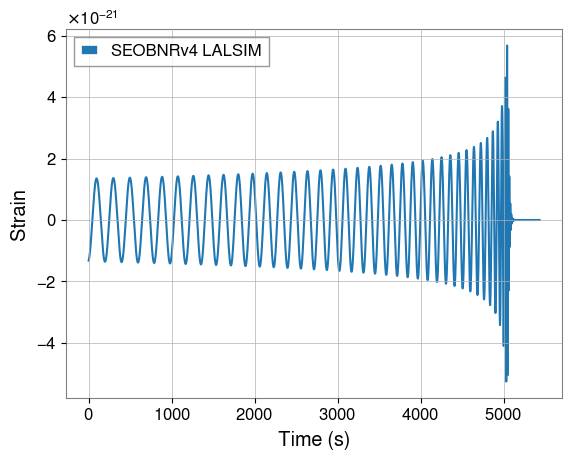

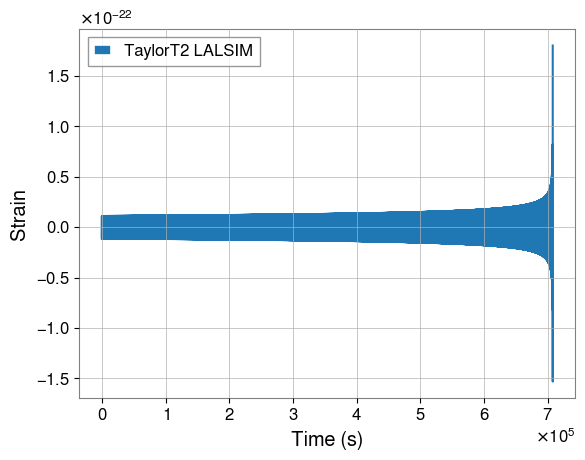

In [4]:
dt = 1./4096
df = 1./4
dist = 100
fmin = 10
fref = 20
fmax = 2000

lalsim_data = []
if __name__=='__main__':
    approxs = [lalsimulation.SEOBNRv4, lalsimulation.TaylorT2, lalsimulation.SEOBNRv4_ROM_NRTidalv2_NSBH]
    parentWV = wv.CompactBinaryCoalescenceGenerator()
    
    for i in range(2):
        waveform = wv.LALCompactBinaryCoalescenceGenerator(approxs[i])
        lalsim_data.append(waveform.generate_td_waveform(mass1 = m1[i]*u.solMass,
                                                         mass2 = m2[i]*u.solMass,
                                                         deltaT = dt*u.s, 
                                                         deltaF = df*u.Hz,
                                                         distance = dist*u.Mpc,
                                                         f_max = fmax*u.Hz))

        plt.plot(range(len(lalsim_data[i][i])), lalsim_data[i][0], label=labels[i]+" LALSIM") #solve the time issue

        plt.ylabel('Strain')
        plt.xlabel('Time (s)')
        plt.legend()
        plt.show()

In [5]:
def sampler(time_array, strain_array):

    discrete_strain_data = np.array([])
    discrete_time_data = np.array([])

    sampling_rate = 1/4096

    running_delta_T = 0
        
    for element in time_array, strain_array:

        if running_delta_T >= sampling_rate:

            
            discrete_strain_data = np.append(discrete_strain_data, strain_array[element])
            discrete_time_data = np.append(discrete_time_data, time_array[element])

            running_delta_T = 0

        running_delta_T += (time_array[element] - time_array[element-1])

    return discrete_time_data, discrete_strain_data

In [6]:
m1 = [30, 1.2, 19.5] #varying masses based on aprox we're using. for i = 3, m1 >= m2
m2 = [20, 1.5, 1.5]



for i in range(2):
    hp, hc = get_td_waveform(approximant=labels[i], mass1=m1[i], mass2=m2[i], delta_t=dt,
                             delta_f=df, distance=dist, f_final = fmax, f_lower = fmin)

    if i == 0:
        test_1, test_2 = sampler(hp.sample_times, hp)

    
    #print(hp.sample_times)
    plt.figure(figsize=(15,3))
    plt.plot(hp.sample_times, hp, label=labels[i])
    plt.ylabel('Strain')
    plt.xlabel('Time (s)')
    plt.legend()
    plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/brett/anaconda3/lib/python3.11/site-packages/pycbc/scheme.py:194 in _scheming_function     │
│                                                                                                  │
│   191 │   │   @wraps(func)                                                                       │
│   192 │   │   def _scheming_function(*args, **kwds):                                             │
│   193 │   │   │   try:                                                                           │
│ ❱ 194 │   │   │   │   return _import_cache[mgr.state][func](*args, **kwds)                       │
│   195 │   │   │   except KeyError:                                                               │
│   196 │   │   │   │   exc_errors = []                                                            │
│   197 │   │   │   │   for sch in mgr.state.__class__.__mro__[0:-2]:                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: <function Array._getvalue at 0x7ffb4d13f240>

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:11                                                                                   │
│                                                                                                  │
│    8 │   │   │   │   │   │   │    delta_f=df, distance=dist, f_final = fmax, f_lower = fmin)     │
│    9 │                                                                                           │
│   10 │   if i == 0:                                                                              │
│ ❱ 11 │   │   test_1, test_2 = sampler(hp.sample_times, hp)                                       │
│   12 │                                                                                           │
│   13 │                                                                                           │
│   14 │   #print(hp.sample_times)                                                                 │
│                                                                                                  │
│ in sampler:19                                                                                    │
│                                                                                                  │
│   16 │   │   │                                                                                   │
│   17 │   │   │   running_delta_T = 0                                                             │
│   18 │   │                                                                                       │
│ ❱ 19 │   │   running_delta_T += (time_array[element] - time_array[element-1])                    │
│   20 │                                                                                           │
│   21 │   return discrete_time_data, discrete_strain_data                                         │
│   22                                                                                             │
│                                                                                                  │
│ /home/brett/anaconda3/lib/python3.11/site-packages/pycbc/types/array.py:65 in convert            │
│                                                                                                  │
│     62 │   @wraps(func)                                                                          │
│     63 │   def convert(self, *args, **kwargs):                                                   │
│     64 │   │   _convert_to_scheme(self)                                                          │
│ ❱   65 │   │   return func(self, *args, **kwargs)                                                │
│     66 │   return convert          

In [ ]:
plt.plot(test_1, test_2)
plt.show()